# Deep Learning

A aprendizagem profunda, do inglês Deep Learning (também conhecida como aprendizado estruturado profundo, aprendizado hierárquico ou aprendizado de máquina profundo) é um ramo de aprendizado de máquina (Machine Learning) baseado em um conjunto de algoritmos que tentam modelar abstrações de alto nível de dados usando um grafo profundo com várias camadas de processamento, compostas de várias transformações lineares e não lineares. https://bityli.com/Zpf0s

### Carregar os dados

In [150]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [151]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Exibir informações relevantes

In [152]:
print("Formato e quantidade das imagens de treino: {}".format(imagens_treino.shape))
print("Formato e quantidade das imagens de treste: {}".format(imagens_teste.shape))

Formato e quantidade das imagens de treino: (60000, 28, 28)
Formato e quantidade das imagens de treste: (10000, 28, 28)


### Plotar imagens

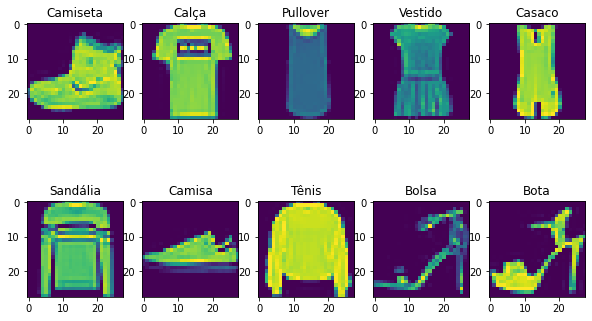

In [153]:
nomes_de_classficicacoes = ['Camiseta','Calça','Pullover',
                             'Vestido','Casaco','Sandália',
                             'Camisa','Tênis','Bolsa','Bota']
plt.figure(figsize=(10,6))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classficicacoes[imagem])

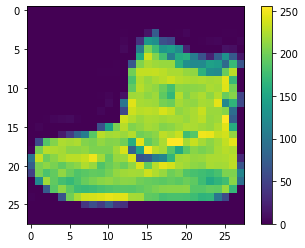

In [154]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Normalizando as imagens

imagens_treino = imagens_treino/float(255)

## Criando o modelo

Modelo de treinamento do Keras,sequência:
- Entrada 
- Processamento
- Saída

In [155]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#------------------------Entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu),#-----------Processamento
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)#----------Saída
])

## Compilando o modelo

In [156]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',#Entropia categorica cruzada esparsa
               metrics=['accuracy']) 
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs=5,
           validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 3.0496 - accuracy: 0.6450 - val_loss: 0.9830 - val_accuracy: 0.6521
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9070 - accuracy: 0.6709 - val_loss: 0.7390 - val_accuracy: 0.7143
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8404 - accuracy: 0.6820 - val_loss: 0.8242 - val_accuracy: 0.7031
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8229 - accuracy: 0.6886 - val_loss: 0.6866 - val_accuracy: 0.7300
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.7871 - accuracy: 0.6954 - val_loss: 0.6594 - val_accuracy: 0.7229


## Salvando o e carregando o modelo

In [157]:
modelo.save('../01.Dados/modelo.h5')
modelo_salvo = load_model('../01.Dados/modelo.h5')

## Exibindo alguns testes no modelo

In [158]:
testes = modelo.predict(imagens_teste)
print("Resultado do teste: {}".format(np.argmax(testes[1])))
print('Número da imagem de teste:',identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print("Resultado do teste: {}".format(np.argmax(testes_modelo_salvo[1])))
print('Número da imagem de teste:',testes_modelo_salvo[1])

Resultado do teste: 4
Número da imagem de teste: 2
Resultado do teste: 4
Número da imagem de teste: [0.04155305 0.01110331 0.30514905 0.0435046  0.31298155 0.01247871
 0.21087663 0.01261698 0.04068924 0.00904695]


## Plotando os graficos de acurácia e predas por épocas

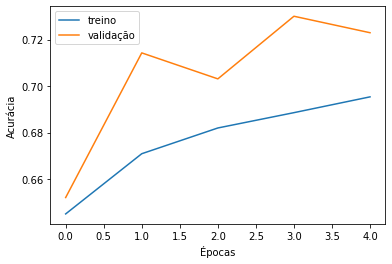

In [159]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

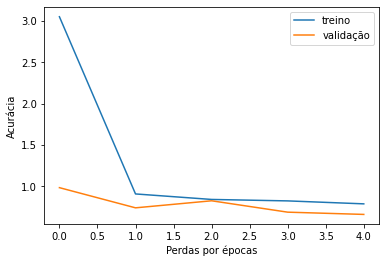

In [160]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.xlabel('Perdas por épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])